In [245]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'
area_data = {
    '시군구': ['기장군', '강서구', '금정구', '해운대구', '사하구', '북구', '사상구', '부산진구', '남구', '동래구', '영도구', '서구', '연제구', '수영구', '동구', '중구'],
    '면적(km^2)': [217.3, 181.49, 65.27, 51.47, 41.89, 39.37, 36.09, 29.67, 26.81, 16.63, 14.19, 13.98, 12.1, 10.21, 9.74, 2.83]
}

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)
df_area = pd.DataFrame(area_data)

# '시군구' 컬럼에서 '동' 정보 추출
df_accident['동'] = df_accident['시군구'].apply(lambda x: x.split(' ')[-1])

# '시군구'에서 '구' 정보 추출
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1])

# 각 구별로 사고건수 계산
grouped_df_accident = df_accident.groupby('구').size().reset_index(name='교통사고건수')

# 면적 데이터와 병합
merged_df = pd.merge(grouped_df_accident, df_area, left_on='구', right_on='시군구')

# 면적별 교통사고율 계산
merged_df['교통사고율'] = merged_df['교통사고건수'] / merged_df['면적(km^2)']

# 결과 출력
print("각 구별 교통사고 건수, 면적 및 교통사고율:")
print(merged_df[['구', '교통사고건수', '면적(km^2)', '교통사고율']])

merged_df


각 구별 교통사고 건수, 면적 및 교통사고율:
       구  교통사고건수  면적(km^2)       교통사고율
0    강서구    1615    181.49    8.898562
1    금정구    2981     65.27   45.671825
2    기장군    1411    217.30    6.493327
3     남구    2282     26.81   85.117493
4     동구    1836      9.74  188.501027
5    동래구    3003     16.63  180.577270
6   부산진구    5363     29.67  180.754971
7     북구    1810     39.37   45.974092
8    사상구    2396     36.09   66.389582
9    사하구    2706     41.89   64.597756
10    서구    1642     13.98  117.453505
11   수영구    2223     10.21  217.727718
12   연제구    2230     12.10  184.297521
13   영도구    1309     14.19   92.248062
14    중구    1183      2.83  418.021201
15  해운대구    2874     51.47   55.838352


,구,교통사고건수,시군구,면적(km^2),교통사고율
0,강서구,1615,강서구,181.49,8.898562
1,금정구,2981,금정구,65.27,45.671825
2,기장군,1411,기장군,217.30,6.493327
3,남구,2282,남구,26.81,85.117493
4,동구,1836,동구,9.74,188.501027
5,동래구,3003,동래구,16.63,180.577270
6,부산진구,5363,부산진구,29.67,180.754971
7,북구,1810,북구,39.37,45.974092
8,사상구,2396,사상구,36.09,66.389582
9,사하구,2706,사하구,41.89,64.597756


In [246]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'
area_data = {
    '시군구': ['기장군', '강서구', '금정구', '해운대구', '사하구', '북구', '사상구', '부산진구', '남구', '동래구', '영도구', '서구', '연제구', '수영구', '동구', '중구'],
    '면적(km^2)': [217.3, 181.49, 65.27, 51.47, 41.89, 39.37, 36.09, 29.67, 26.81, 16.63, 14.19, 13.98, 12.1, 10.21, 9.74, 2.83]
}

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)
df_area = pd.DataFrame(area_data)

# '시군구' 열의 결측값을 최빈값으로 대체
mode_value = df_accident['시군구'].mode().iloc[0]
df_accident['시군구'] = df_accident['시군구'].fillna(mode_value)

# '시군구' 컬럼에서 '동' 정보 추출
df_accident['동'] = df_accident['시군구'].apply(lambda x: x.split(' ')[-1])

# '시군구'에서 '구' 정보 추출
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1] if len(x.split(' ')) > 1 else x)

# 각 구별로 사고건수 계산
grouped_df_accident = df_accident.groupby('구').size().reset_index(name='교통사고건수')

# 면적 데이터와 병합
merged_df = pd.merge(grouped_df_accident, df_area, left_on='구', right_on='시군구')

# 면적별 교통사고율 계산
merged_df['교통사고율'] = merged_df['교통사고건수'] / merged_df['면적(km^2)']

# 결과 출력
print("각 구별 교통사고 건수, 면적 및 교통사고율:")
print(merged_df[['구', '교통사고건수', '면적(km^2)', '교통사고율']])

# 교통사고율이 높은 상위 5개 구 선택
top5_accident_rate = merged_df.nlargest(5, '교통사고율')

# 결과 출력
print("상위 5개 구의 교통사고 건수, 면적 및 교통사고율:")
print(top5_accident_rate[['구', '교통사고건수', '면적(km^2)', '교통사고율']])


각 구별 교통사고 건수, 면적 및 교통사고율:
       구  교통사고건수  면적(km^2)       교통사고율
0    강서구    1615    181.49    8.898562
1    금정구    2981     65.27   45.671825
2    기장군    1411    217.30    6.493327
3     남구    2282     26.81   85.117493
4     동구    1836      9.74  188.501027
5    동래구    3003     16.63  180.577270
6   부산진구    5363     29.67  180.754971
7     북구    1810     39.37   45.974092
8    사상구    2396     36.09   66.389582
9    사하구    2706     41.89   64.597756
10    서구    1642     13.98  117.453505
11   수영구    2223     10.21  217.727718
12   연제구    2230     12.10  184.297521
13   영도구    1309     14.19   92.248062
14    중구    1183      2.83  418.021201
15  해운대구    2874     51.47   55.838352
상위 5개 구의 교통사고 건수, 면적 및 교통사고율:
       구  교통사고건수  면적(km^2)       교통사고율
14    중구    1183      2.83  418.021201
11   수영구    2223     10.21  217.727718
4     동구    1836      9.74  188.501027
12   연제구    2230     12.10  184.297521
6   부산진구    5363     29.67  180.754971


In [247]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"  # 맥 OS에서 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 시각화
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 교통사고 건수 막대 그래프
axes[0].bar(top5_accident_rate['구'], top5_accident_rate['교통사고건수'], color='skyblue')
axes[0].set_title('상위 5개 구의 교통사고 건수')
axes[0].set_ylabel('교통사고 건수')

# 면적 막대 그래프
axes[1].bar(top5_accident_rate['구'], top5_accident_rate['면적(km^2)'], color='lightgreen')
axes[1].set_title('상위 5개 구의 면적')
axes[1].set_ylabel('면적 (km^2)')

# 교통사고율 막대 그래프
axes[2].bar(top5_accident_rate['구'], top5_accident_rate['교통사고율'], color='lightcoral')
axes[2].set_title('상위 5개 구의 교통사고율')
axes[2].set_ylabel('교통사고율')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

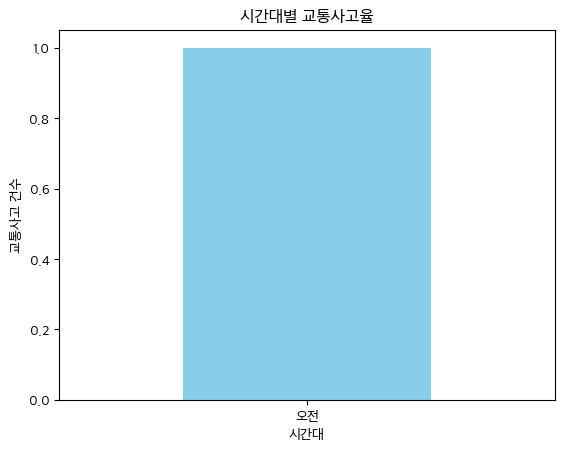

In [ ]:
import pandas as pd

# 주어진 데이터 예시
data = {
    "사고일시": ["2020년 1월 2일 11시"],
    # ... 다른 컬럼들
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 사용자 정의 함수로 날짜와 시간 추출
def extract_date_time(text):
    parts = text.split()
    year = int(parts[0][:-1])  # "년" 제거 후 정수로 변환
    month = int(parts[1][:-1])  # "월" 제거 후 정수로 변환
    day = int(parts[2][:-1])  # "일" 제거 후 정수로 변환
    hour = int(parts[3][:-1])  # "시" 제거 후 정수로 변환
    return pd.Timestamp(year, month, day, hour)

# "사고일시" 컬럼에서 날짜와 시간 추출
df['사고일시'] = df['사고일시'].apply(extract_date_time)

# 시간대 구분 함수
def classify_time(hour):
    if 0 <= hour < 6:
        return "새벽"
    elif 6 <= hour < 12:
        return "오전"
    elif 12 <= hour < 18:
        return "오후"
    else:
        return "저녁"

# "시간대" 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour.apply(classify_time)

# 시간대별 교통사고율 계산
accident_rate_by_time = df.groupby('시간대').size()

# 시간대별 교통사고율 시각화
accident_rate_by_time.plot(kind='bar', color='skyblue', rot=0)
plt.title('시간대별 교통사고율')
plt.xlabel('시간대')
plt.ylabel('교통사고 건수')
plt.show()


In [ ]:
from urllib.parse import unquote

encoded_key = "qSik2aAqQQwmtaBrNnMavyWzinL%2FEYuIs7t21P%2BmrSAazkprKuKHvm%2BtI8n389pMlbMHGYx6PjivrdAWBAqC%2FQ%3D%3D"

# URL 디코딩
decoded_key = unquote(encoded_key)

print(decoded_key)

qSik2aAqQQwmtaBrNnMavyWzinL/EYuIs7t21P+mrSAazkprKuKHvm+tI8n389pMlbMHGYx6PjivrdAWBAqC/Q==


In [ ]:
import pandas as pd

# 주어진 데이터
accident_data = {
    '구': ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
    '교통사고건수': [1615, 2981, 1411, 2282, 1836, 3003, 5363, 1810, 2396, 2706, 1642, 2223, 2230, 1309, 1183, 2874],
    '면적(km^2)': [181.49, 65.27, 217.30, 26.81, 9.74, 16.63, 29.67, 39.37, 36.09, 41.89, 13.98, 10.21, 12.10, 14.19, 2.83, 51.47]
}

# 데이터프레임 생성
df_accident = pd.DataFrame(accident_data)

# 면적 대비 교통사고 비율 계산
df_accident['교통사고율'] = df_accident['교통사고건수'] / df_accident['면적(km^2)']

# 결과 출력
print(df_accident)


       구  교통사고건수  면적(km^2)       교통사고율
0    강서구    1615    181.49    8.898562
1    금정구    2981     65.27   45.671825
2    기장군    1411    217.30    6.493327
3     남구    2282     26.81   85.117493
4     동구    1836      9.74  188.501027
5    동래구    3003     16.63  180.577270
6   부산진구    5363     29.67  180.754971
7     북구    1810     39.37   45.974092
8    사상구    2396     36.09   66.389582
9    사하구    2706     41.89   64.597756
10    서구    1642     13.98  117.453505
11   수영구    2223     10.21  217.727718
12   연제구    2230     12.10  184.297521
13   영도구    1309     14.19   92.248062
14    중구    1183      2.83  418.021201
15  해운대구    2874     51.47   55.838352


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/2573969422.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구', y='교통사고율', data=df_accident, palette='viridis')


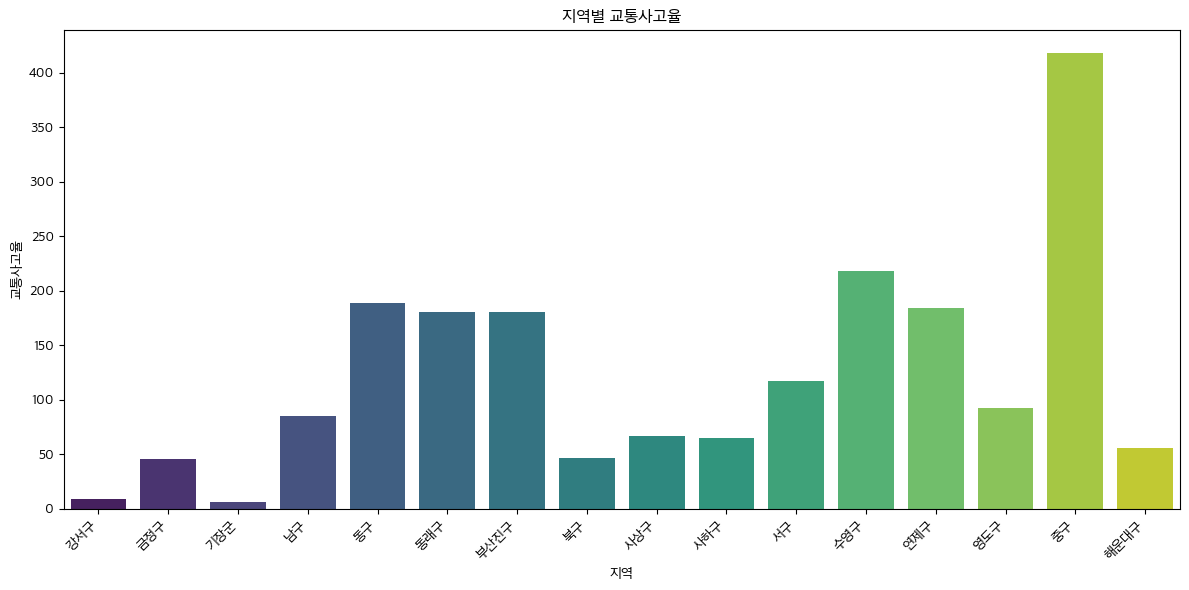

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"  # 맥 OS에서 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 데이터프레임
df_accident = pd.DataFrame({
    '구': ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
    '교통사고건수': [1615, 2981, 1411, 2282, 1836, 3003, 5363, 1810, 2396, 2706, 1642, 2223, 2230, 1309, 1183, 2874],
    '면적(km^2)': [181.49, 65.27, 217.30, 26.81, 9.74, 16.63, 29.67, 39.37, 36.09, 41.89, 13.98, 10.21, 12.10, 14.19, 2.83, 51.47],
    '교통사고율': [8.898562, 45.671825, 6.493327, 85.117493, 188.501027, 180.577270, 180.754971, 45.974092, 66.389582, 64.597756, 117.453505, 217.727718, 184.297521, 92.248062, 418.021201, 55.838352]
})

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='교통사고율', data=df_accident, palette='viridis')
plt.title('지역별 교통사고율')
plt.xlabel('지역')
plt.ylabel('교통사고율')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1360744043.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구', y='교통사고건수', data=merged_df, palette='viridis')


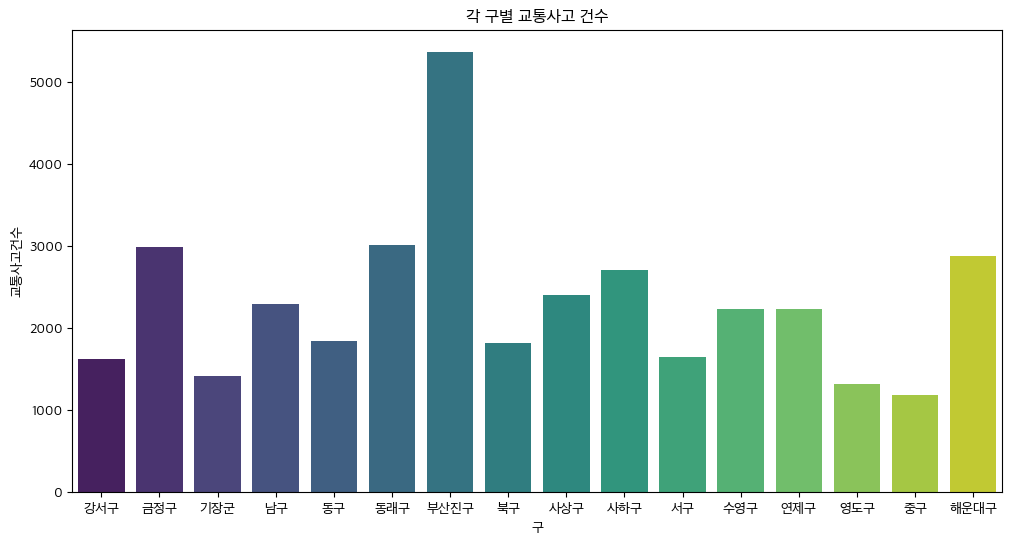

/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1360744043.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구', y='면적(km^2)', data=merged_df, palette='plasma')


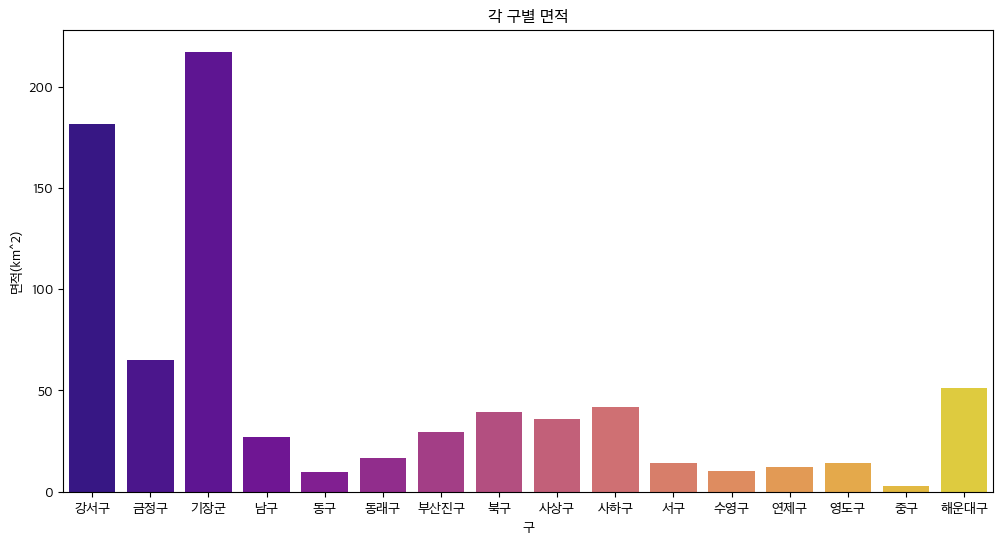

/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1360744043.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='구', y='교통사고율', data=merged_df, palette='magma')


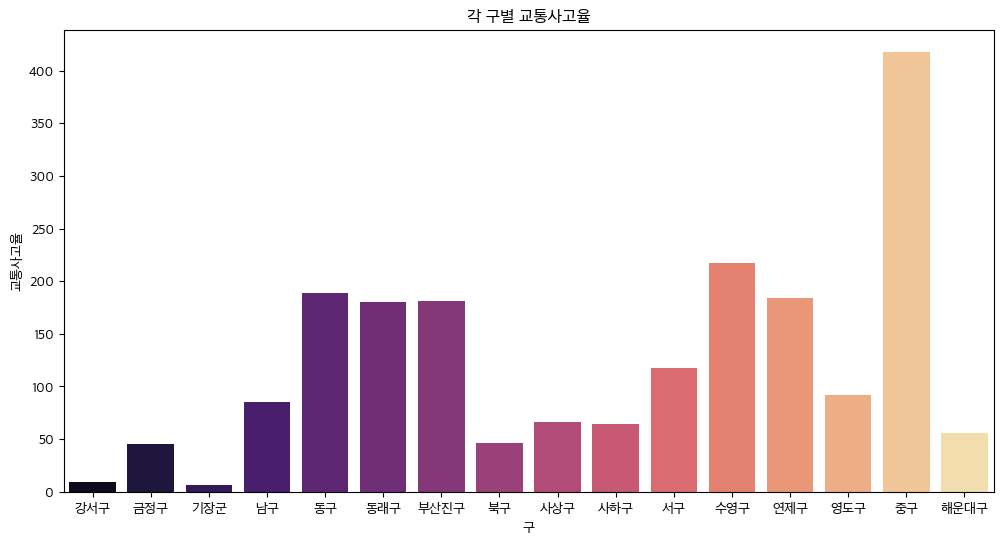

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"  # 맥 OS에서 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)



# CSV 파일 경로
csv_file_path = '교통사고2.csv'
area_data = {
    '시군구': ['기장군', '강서구', '금정구', '해운대구', '사하구', '북구', '사상구', '부산진구', '남구', '동래구', '영도구', '서구', '연제구', '수영구', '동구', '중구'],
    '면적(km^2)': [217.3, 181.49, 65.27, 51.47, 41.89, 39.37, 36.09, 29.67, 26.81, 16.63, 14.19, 13.98, 12.1, 10.21, 9.74, 2.83]
}

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)
df_area = pd.DataFrame(area_data)

# '시군구' 컬럼에서 '동' 정보 추출
df_accident['동'] = df_accident['시군구'].apply(lambda x: x.split(' ')[-1])

# '시군구'에서 '구' 정보 추출
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1])

# 각 구별로 사고건수 계산
grouped_df_accident = df_accident.groupby('구').size().reset_index(name='교통사고건수')

# 면적 데이터와 병합
merged_df = pd.merge(grouped_df_accident, df_area, left_on='구', right_on='시군구')

# 면적별 교통사고율 계산
merged_df['교통사고율'] = merged_df['교통사고건수'] / merged_df['면적(km^2)']

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='교통사고건수', data=merged_df, palette='viridis')
plt.title('각 구별 교통사고 건수')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='면적(km^2)', data=merged_df, palette='plasma')
plt.title('각 구별 면적')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='교통사고율', data=merged_df, palette='magma')
plt.title('각 구별 교통사고율')
plt.show()


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)

# '사고부문' 컬럼의 고유한 값 확인
unique_accident_types = df_accident['사고부문'].unique()

# 결과 출력
print("사고부문 종류:")
for accident_type in unique_accident_types:
    print(accident_type)



사고부문 종류:
택시사고
노인사고
어린이보호구역 내 어린이 보행자 사고
음주운전
자전거사고
어린이보호구역 사고
렌터카사고
무면허사고
노인보행자사고
어린이보호구역 내 어린이 사고
횡단보도외횡단중사고
보행자사고
노인운전자사고
어린이사고
뺑소니사고
노선버스사고
보행어린이사고


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)
# '시군구' 열의 값에서 '부산광역시' 다음에 오는 부분 추출하여 '구' 열에 저장
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1])

# '구' 열의 고유한 값 확인
unique_regions = df_accident['구'].unique()

# 결과 출력
print("구의 목록:")
for region in unique_regions:
    print(region)




구의 목록:
남구
북구
부산진구
서구
기장군
수영구
강서구
사상구
중구
사하구
해운대구
금정구
영도구
동래구
동구
연제구


In [ ]:
# '구' 열 값의 빈도수 세기
region_counts = df_accident['구'].value_counts()

# 결과 출력
print("구별 사고 빈도수:")
print(region_counts)

# 전체 '구'에서의 사고 빈도수 구하기
total_accidents = region_counts.sum()
# 결과 출력
print("전체 구에서의 사고 빈도수:", total_accidents)

구별 사고 빈도수:
구
부산진구    5363
동래구     3003
금정구     2981
해운대구    2874
사하구     2706
사상구     2396
남구      2282
연제구     2230
수영구     2223
동구      1836
북구      1810
서구      1642
강서구     1615
기장군     1411
영도구     1309
중구      1183
Name: count, dtype: int64
전체 구에서의 사고 빈도수: 36864


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)

# '가해운전자 연령' 열의 데이터를 숫자형으로 변환
df_accident['가해운전자 연령'] = pd.to_numeric(df_accident['가해운전자 연령'], errors='coerce')

# '피해운전자 연령' 열의 데이터를 숫자형으로 변환
df_accident['피해운전자 연령'] = pd.to_numeric(df_accident['피해운전자 연령'], errors='coerce')

# '사고부문'이 '보행자사고'이고, '가해운전자 연령'이 숫자이며, '피해운전자 연령'이 숫자인 경우 필터링
pedestrian_accidents = df_accident[
    ((df_accident['사고부문'] == '보행자사고') | (df_accident['사고부문'] == '노인보행자사고')) & 
    df_accident['가해운전자 연령'].notnull() & 
    df_accident['피해운전자 연령'].notnull()
]

# 결과 출력
print("보행자 사고 데이터 예시:")
print(pedestrian_accidents.head())


보행자 사고 데이터 예시:
                   사고부문             사고일시   요일              시군구  사고내용  사망자수  \
14684  노인보행자사고  2020년 1월 1일 19시  수요일    부산광역시 강서구 강동동  경상사고     0   
14685  노인보행자사고  2020년 1월 2일 18시  목요일  부산광역시 서구 동대신동2가  중상사고     0   
14686  노인보행자사고  2020년 1월 3일 06시  금요일     부산광역시 남구 우암동  중상사고     0   
14687  노인보행자사고  2020년 1월 4일 19시  토요일     부산광역시 동구 초량동  경상사고     0   
14688  노인보행자사고  2020년 1월 4일 21시  토요일    부산광역시 해운대구 중동  중상사고     0   

       중상자수  경상자수  부상신고자수        사고유형  ... 기상상태        도로형태 가해운전자 차종 가해운전자 성별  \
14684     0     1       0  차대사람 - 횡단중  ...   맑음    단일로 - 기타       승용        남   
14685     1     0       0  차대사람 - 횡단중  ...   맑음  교차로 - 교차로안       승용        남   
14686     1     0       0   차대사람 - 기타  ...   맑음  교차로 - 교차로안       승용        남   
14687     0     1       0   차대사람 - 기타  ...   맑음  교차로 - 교차로안       승용        남   
14688     1     0       0   차대사람 - 기타  ...   맑음    단일로 - 기타       이륜        남   

      가해운전자 연령 가해운전자 상해정도  피해

In [ ]:
# '사고부문'이 '보행자사고'이고, '가해운전자 연령'이 숫자이며, '피해운전자 연령'이 숫자인 경우 필터링
pedestrian_accidents = df_accident[
    ((df_accident['사고부문'] == '보행자사고') | (df_accident['사고부문'] == '노인보행자사고')) & 
    df_accident['가해운전자 연령'].notnull() & 
    df_accident['피해운전자 연령'].notnull()
]

# 지역별 65세 이상 보행자 사고수
accidents_65_above_by_region = pedestrian_accidents[pedestrian_accidents['가해운전자 연령'] >= 60]['시군구'].value_counts()

# 지역별 65세 미만 보행자 사고수
accidents_below_65_by_region = pedestrian_accidents[pedestrian_accidents['가해운전자 연령'] < 60]['시군구'].value_counts()

# 상위 10개 지역 선택
top_10_65_above = accidents_65_above_by_region.head(5)
top_10_below_65 = accidents_below_65_by_region.head(5)

# 결과 출력
print("지역별 60세 이상 보행자 사고 상위 10개:")
print(top_10_65_above)

print("\n지역별 60세 미만 보행자 사고 상위 10개:")
print(top_10_below_65)


지역별 60세 이상 보행자 사고 상위 10개:
시군구
부산광역시 연제구 연산동     150
부산광역시 부산진구 부전동    110
부산광역시 남구 대연동       92
부산광역시 동래구 온천동      88
부산광역시 금정구 서동       84
Name: count, dtype: int64

지역별 60세 미만 보행자 사고 상위 10개:
시군구
부산광역시 부산진구 부전동    416
부산광역시 연제구 연산동     332
부산광역시 남구 대연동      257
부산광역시 수영구 광안동     223
부산광역시 동래구 온천동     167
Name: count, dtype: int64


In [ ]:
# '사고부문'이 '보행자사고'이고, '가해운전자 연령'이 숫자이며, '피해운전자 연령'이 숫자인 경우 필터링
pedestrian_accidents = df_accident[
    ((df_accident['사고부문'] == '보행자사고') | (df_accident['사고부문'] == '노인보행자사고')) & 
    df_accident['가해운전자 연령'].notnull() & 
    df_accident['피해운전자 연령'].notnull()
]

# 지역별 65세 이상 보행자 사고수
accidents_65_above_by_region = pedestrian_accidents[pedestrian_accidents['가해운전자 연령'] >= 60]['시군구'].value_counts()

# 지역별 65세 미만 보행자 사고수
accidents_below_65_by_region = pedestrian_accidents[pedestrian_accidents['가해운전자 연령'] < 60]['시군구'].value_counts()

# 상위 10개 지역 선택
top_10_65_above = accidents_65_above_by_region.head(10)
top_10_below_65 = accidents_below_65_by_region.head(10)

# 결과 출력
print("지역별 60세 이상 보행자 사고 상위 10개:")
print(top_10_65_above)

print("\n지역별 60세 미만 보행자 사고 상위 10개:")
print(top_10_below_65)


지역별 60세 이상 보행자 사고 상위 10개:
시군구
부산광역시 연제구 연산동     150
부산광역시 부산진구 부전동    110
부산광역시 남구 대연동       92
부산광역시 동래구 온천동      88
부산광역시 금정구 서동       84
부산광역시 수영구 광안동      78
부산광역시 동구 초량동       74
부산광역시 기장군 기장읍      59
부산광역시 금정구 부곡동      59
부산광역시 사하구 괴정동      57
Name: count, dtype: int64

지역별 60세 미만 보행자 사고 상위 10개:
시군구
부산광역시 부산진구 부전동    416
부산광역시 연제구 연산동     332
부산광역시 남구 대연동      257
부산광역시 수영구 광안동     223
부산광역시 동래구 온천동     167
부산광역시 금정구 부곡동     160
부산광역시 연제구 거제동     142
부산광역시 금정구 장전동     133
부산광역시 사하구 하단동     131
부산광역시 부산진구 전포동    130
Name: count, dtype: int64


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)

# '가해운전자 연령' 열의 데이터를 숫자형으로 변환
df_accident['가해운전자 연령'] = pd.to_numeric(df_accident['가해운전자 연령'], errors='coerce')

# '피해운전자 연령' 열의 데이터를 숫자형으로 변환
df_accident['피해운전자 연령'] = pd.to_numeric(df_accident['피해운전자 연령'], errors='coerce')

# '사고부문'이 '보행자사고'이고, '가해운전자 연령'이 숫자이며, '피해운전자 연령'이 숫자인 경우 필터링
pedestrian_accidents = df_accident[
    (df_accident['사고부문'] == '보행자사고') & 
    df_accident['가해운전자 연령'].notnull() & 
    df_accident['피해운전자 연령'].notnull()
]

# '시군구'에서 '구'만 추출하여 '구' 열 추가
pedestrian_accidents['구'] = pedestrian_accidents['시군구'].apply(lambda x: x.split(' ')[1])

# 구별로 보행자 사고 건수 계산
pedestrian_accidents_by_region = pedestrian_accidents['구'].value_counts()

# 결과 출력
print("구별 보행자 사고 건수:")
print(pedestrian_accidents_by_region)

total_pedestrian_accidents = len(pedestrian_accidents)

print("총 보행자 사고 건수:", total_pedestrian_accidents)

구별 보행자 사고 건수:
구
부산진구    1203
동래구      685
금정구      683
사하구      594
해운대구     569
사상구      545
수영구      539
연제구      521
남구       515
북구       403
동구       349
서구       316
영도구      293
중구       267
기장군      258
강서구      172
Name: count, dtype: int64
총 보행자 사고 건수: 7912


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/438029745.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_accidents['구'] = pedestrian_accidents['시군구'].apply(lambda x: x.split(' ')[1])


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)

# '가해운전자 연령' 열의 데이터를 숫자형으로 변환
df_accident['가해운전자 연령'] = pd.to_numeric(df_accident['가해운전자 연령'], errors='coerce')


# '사고부문'이 '보행자사고'이고, '가해운전자 연령'이 숫자이며, '피해운전자 연령'이 숫자인 경우 필터링
pedestrian_accidents = df_accident[
    (df_accident['사고부문'] == '보행자사고') & 
    df_accident['가해운전자 연령'].notnull()  
 
]

# '시군구'에서 '구'만 추출하여 '구' 열 추가
pedestrian_accidents['구'] = pedestrian_accidents['시군구'].apply(lambda x: x.split(' ')[1])

# 구별로 보행자 사고 건수 계산
pedestrian_accidents_by_region = pedestrian_accidents['구'].value_counts()

# 결과 출력
print("구별 보행자 사고 건수:")
print(pedestrian_accidents_by_region)

total_pedestrian_accidents = len(pedestrian_accidents)

print("총 보행자 사고 건수:", total_pedestrian_accidents)

구별 보행자 사고 건수:
구
부산진구    1204
동래구      685
금정구      684
사하구      594
해운대구     572
사상구      545
수영구      539
연제구      521
남구       515
북구       403
동구       350
서구       316
영도구      294
중구       267
기장군      259
강서구      173
Name: count, dtype: int64
총 보행자 사고 건수: 7921


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1072663319.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_accidents['구'] = pedestrian_accidents['시군구'].apply(lambda x: x.split(' ')[1])


In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'
area_data = {
    '시군구': ['기장군', '강서구', '금정구', '해운대구', '사하구', '북구', '사상구', '부산진구', '남구', '동래구', '영도구', '서구', '연제구', '수영구', '동구', '중구'],
    '면적(km^2)': [217.3, 181.49, 65.27, 51.47, 41.89, 39.37, 36.09, 29.67, 26.81, 16.63, 14.19, 13.98, 12.1, 10.21, 9.74, 2.83]
}

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)
df_area = pd.DataFrame(area_data)

# '시군구' 컬럼에서 '동' 정보 추출
df_accident['동'] = df_accident['시군구'].apply(lambda x: x.split(' ')[-1])

# '시군구'에서 '구' 정보 추출
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1])

# 각 구별로 사고건수 계산
grouped_df_accident = df_accident.groupby('구').size().reset_index(name='교통사고건수')

# 특정 사고부문에 대한 구별 사고 건수
accident_type = '택시사고'
accident_by_type = df_accident[df_accident['사고부문'] == accident_type].groupby('구').size().reset_index(name=f'{accident_type}_건수')

# 결과 출력
print("각 구별 교통사고 건수, 면적 및 교통사고율:")
print(merged_df[['구', '교통사고건수', '면적(km^2)', '교통사고율']])
print(f"\n{accident_type}에 대한 각 구별 사고 건수:")
print(accident_by_type)


각 구별 교통사고 건수, 면적 및 교통사고율:
       구  교통사고건수  면적(km^2)       교통사고율
0    강서구    1615    181.49    8.898562
1    금정구    2981     65.27   45.671825
2    기장군    1411    217.30    6.493327
3     남구    2282     26.81   85.117493
4     동구    1836      9.74  188.501027
5    동래구    3003     16.63  180.577270
6   부산진구    5363     29.67  180.754971
7     북구    1810     39.37   45.974092
8    사상구    2396     36.09   66.389582
9    사하구    2706     41.89   64.597756
10    서구    1642     13.98  117.453505
11   수영구    2223     10.21  217.727718
12   연제구    2230     12.10  184.297521
13   영도구    1309     14.19   92.248062
14    중구    1183      2.83  418.021201
15  해운대구    2874     51.47   55.838352

택시사고에 대한 각 구별 사고 건수:
       구  택시사고_건수
0    강서구       95
1    금정구      194
2    기장군       59
3     남구      201
4     동구      224
5    동래구      245
6   부산진구      579
7     북구      120
8    사상구      179
9    사하구      232
10    서구      144
11   수영구      226
12   연제구      214
13   영도구      114
14    중구      124
1

In [ ]:
import pandas as pd

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)

# '시군구' 컬럼에서 '동' 정보 추출
df_accident['동'] = df_accident['시군구'].apply(lambda x: x.split(' ')[-1])

# '시군구'에서 '구' 정보 추출
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1])

# 각 구별로 사고부문별 사고건수 계산
accident_by_type_and_district = df_accident.groupby(['구', '사고부문']).size().reset_index(name='사고건수')

# 결과 출력
print("각 구별로 사고부문별 사고건수:")
print(accident_by_type_and_district)
accident_by_type_and_district


각 구별로 사고부문별 사고건수:
        구                                      사고부문  사고건수
0     강서구                             노선버스사고    31
1     강서구                          노인보행자사고    42
2     강서구                               보행자사고   174
3     강서구  어린이보호구역 내 어린이 보행자 사고     4
4     강서구          어린이보호구역 내 어린이 사고     6
..    ...                                       ...   ...
267  해운대구                                   보행어린이사고    46
268  해운대구                                     뺑소니사고   108
269  해운대구                                     어린이사고   136
270  해운대구                                     자전거사고    44
271  해운대구                                      택시사고   241

[272 rows x 3 columns]


,구,사고부문,사고건수
0,강서구,노선버스사고,31
1,강서구,노인보행자사고,42
2,강서구,보행자사고,174
3,강서구,어린이보호구역 내 어린이 보행자 사고,4
4,강서구,어린이보호구역 내 어린이 사고,6
...,...,...,...
267,해운대구,보행어린이사고,46
268,해운대구,뺑소니사고,108
269,해운대구,어린이사고,136
270,해운대구,자전거사고,44


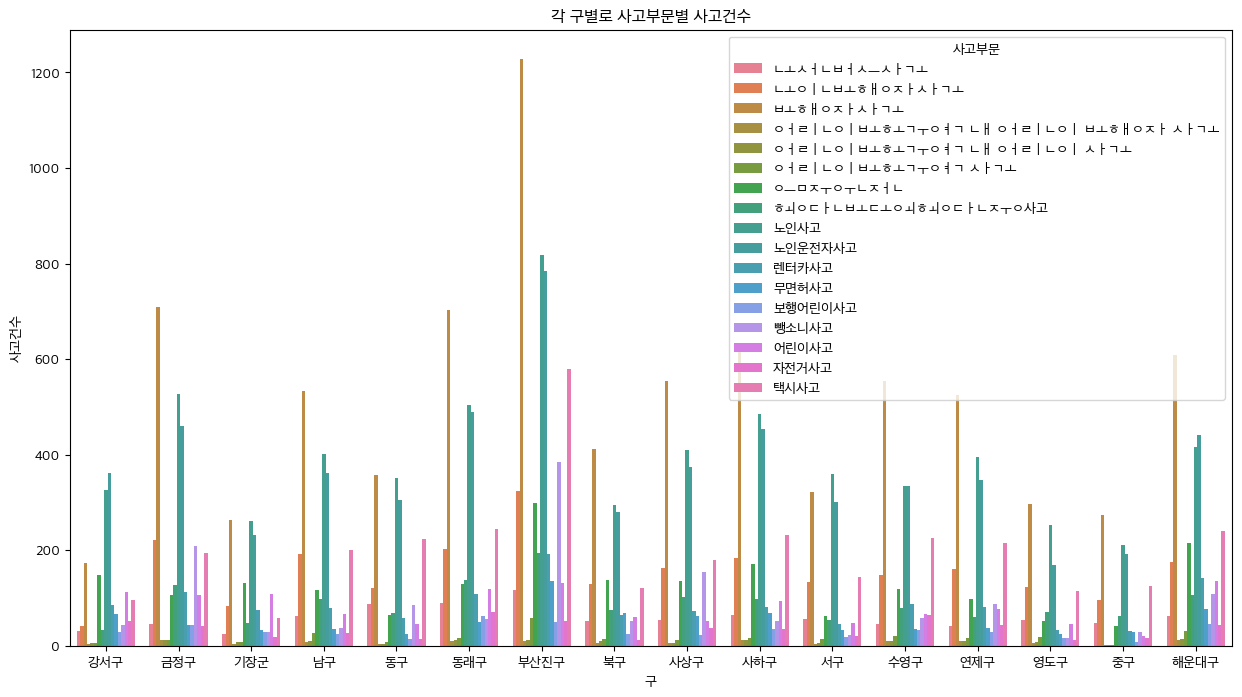

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = '교통사고2.csv'

# 데이터 불러오기
df_accident = pd.read_csv(csv_file_path)

# '시군구' 컬럼에서 '동' 정보 추출
df_accident['동'] = df_accident['시군구'].apply(lambda x: x.split(' ')[-1])

# '시군구'에서 '구' 정보 추출
df_accident['구'] = df_accident['시군구'].apply(lambda x: x.split(' ')[1])

# 각 구별로 사고부문별 사고건수 계산
accident_by_type_and_district = df_accident.groupby(['구', '사고부문']).size().reset_index(name='사고건수')

# 시각화
plt.figure(figsize=(15, 8))
sns.barplot(x='구', y='사고건수', hue='사고부문', data=accident_by_type_and_district)
plt.title('각 구별로 사고부문별 사고건수')
plt.show()


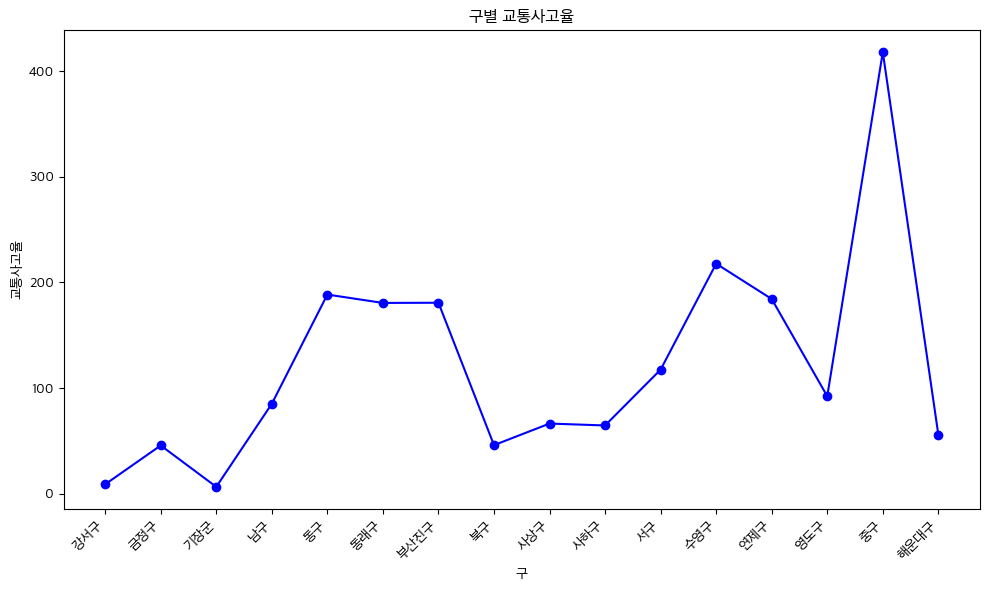

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 가상의 데이터프레임 생성 (실제 데이터를 사용해야 합니다)
data = {
    '구': ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구'],
    '교통사고건수': [1615, 2981, 1411, 2282, 1836, 3003, 5363, 1810, 2396, 2706, 1642, 2223, 2230, 1309, 1183, 2874],
    '면적(km^2)': [181.49, 65.27, 217.30, 26.81, 9.74, 16.63, 29.67, 39.37, 36.09, 41.89, 13.98, 10.21, 12.10, 14.19, 2.83, 51.47],
    '교통사고율': [8.898562, 45.671825, 6.493327, 85.117493, 188.501027, 180.577270, 180.754971, 45.974092, 66.389582, 64.597756, 117.453505, 217.727718, 184.297521, 92.248062, 418.021201, 55.838352]
}

df = pd.DataFrame(data)

# 선형 차트 생성
plt.figure(figsize=(10, 6))
plt.plot(df['구'], df['교통사고율'], marker='o', linestyle='-', color='b')
plt.title('구별 교통사고율')
plt.xlabel('구')
plt.ylabel('교통사고율')
plt.xticks(rotation=45, ha='right')  # x축 레이블을 읽기 쉽게 회전
plt.tight_layout()
plt.show()


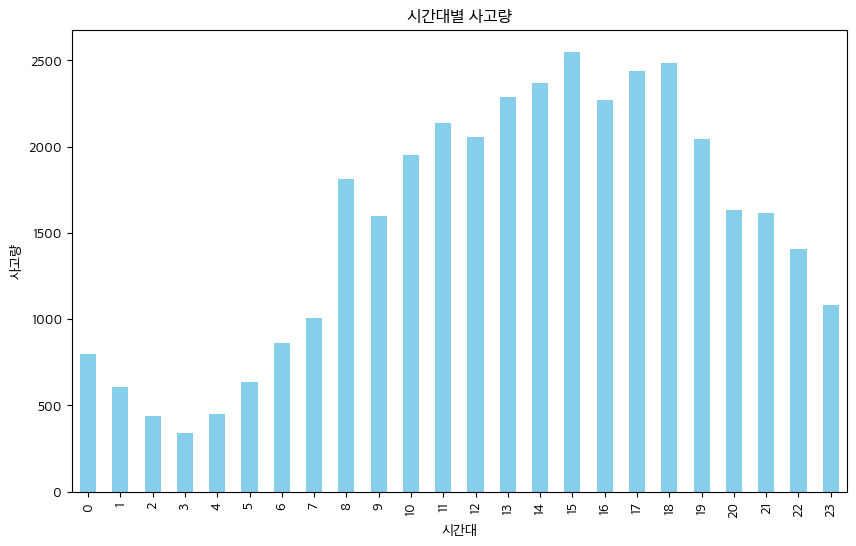

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# 결측값을 처리하고 '시간대' 컬럼 추가 (정수로 변환)
df['시간대'] = df['사고일시'].dt.hour.astype('Int64')

# 결측값이 있는 행 삭제
df = df.dropna(subset=['시간대'])

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color='skyblue')
plt.title('시간대별 사고량')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1074622439.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour


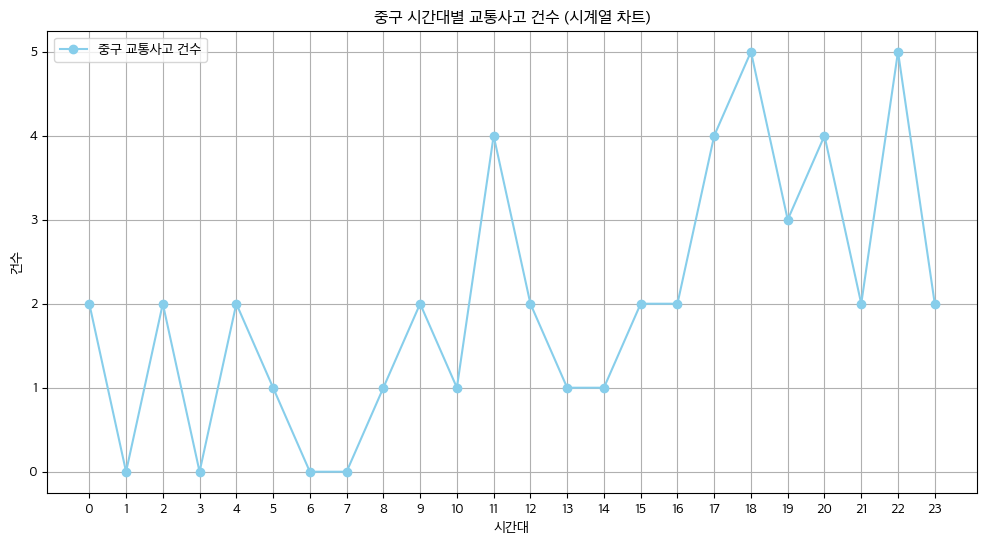

Index(['사고부문', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', nrows=1000)

# '시군구' 열의 NaN 값을 'Unknown'으로 대체
df['시군구'] = df['시군구'].fillna('Unknown')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열이 중구인 행만 선택
중구_교통사고 = df[df['시군구'].str.contains('중구')]

# '시간대' 컬럼 추가
중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour

# 시간대별 교통사고 수 계산
시간대별_교통사고수 = 중구_교통사고['시간대'].value_counts().sort_index()

# 중구 전체 교통사고 수 계산
전체_교통사고수 = df['사고일시'].dt.hour.value_counts().sort_index()

# 시간대가 0부터 23까지인 데이터만 선택
시간대별_교통사고수 = 시간대별_교통사고수.reindex(range(24), fill_value=0)

# 시계열 차트 그리기
plt.figure(figsize=(12, 6))
plt.plot(range(24), 시간대별_교통사고수, marker='o', label='중구 교통사고 건수', color='skyblue')
plt.title('중구 시간대별 교통사고 건수 (시계열 차트)')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(24))  # x축에 고정된 범위의 시간대 표시
plt.legend()
plt.grid(True)
plt.show()
print(df.columns)


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/3153435638.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  사고부문_교통사고['시간대'] = 사고부문_교통사고['사고일시'].dt.hour


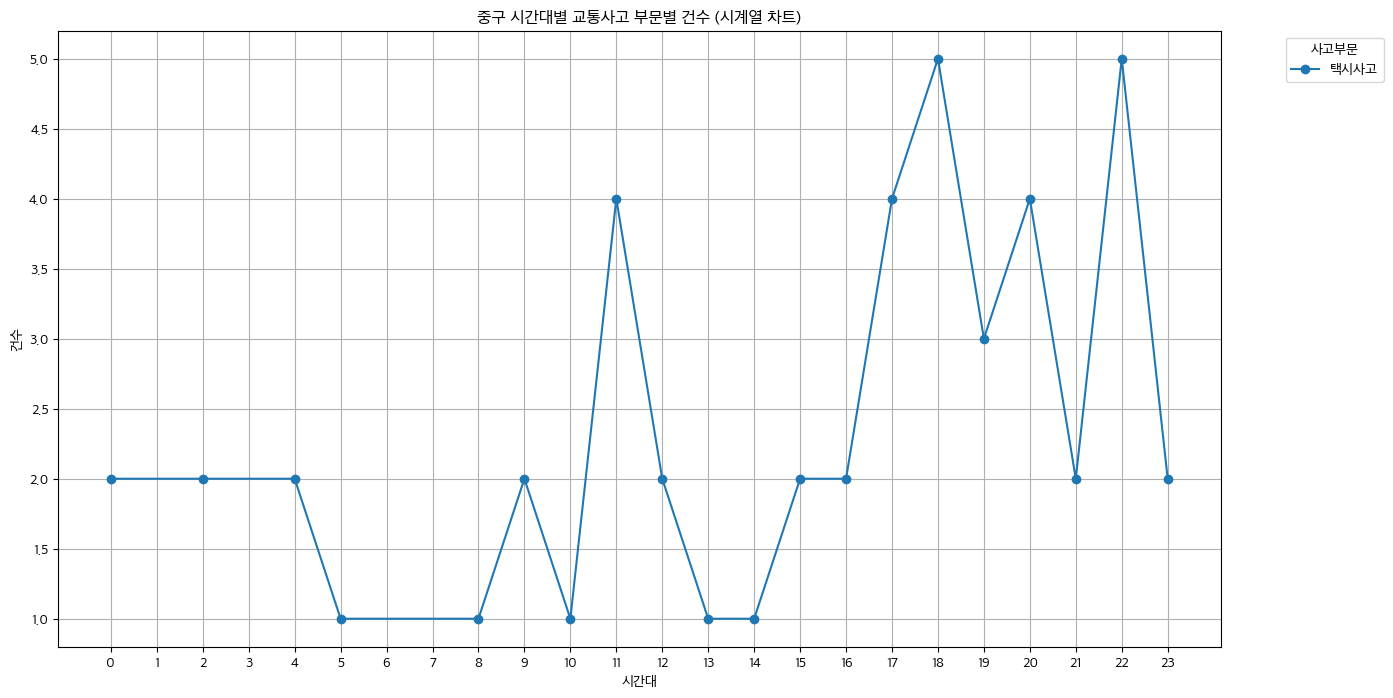

['택시사고']


In [ ]:
# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')
# '사고부문' 열이 있는 행만 선택
사고부문_교통사고 = 중구_교통사고[['사고일시', '사고부문']]

# '시간대' 컬럼 추가
사고부문_교통사고['시간대'] = 사고부문_교통사고['사고일시'].dt.hour

# 시간대별로 사고 부문별 건수 계산
시간대별_사고부문_교통사고수 = 사고부문_교통사고.groupby(['시간대', '사고부문']).size().unstack(fill_value=0)

# 시간대별 사고 부문별 건수를 시계열 차트로 그리기
plt.figure(figsize=(15, 8))
시간대별_사고부문_교통사고수.plot(kind='line', marker='o', cmap='tab20', ax=plt.gca())
plt.title('중구 시간대별 교통사고 부문별 건수 (시계열 차트)')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(24))  # x축에 고정된 범위의 시간대 표시
plt.legend(title='사고부문', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# '사고부문' 열의 고유한 값 확인
고유_사고부문 = 중구_교통사고['사고부문'].unique()

# '사고부문' 열의 고유한 값 출력
print(고유_사고부문)



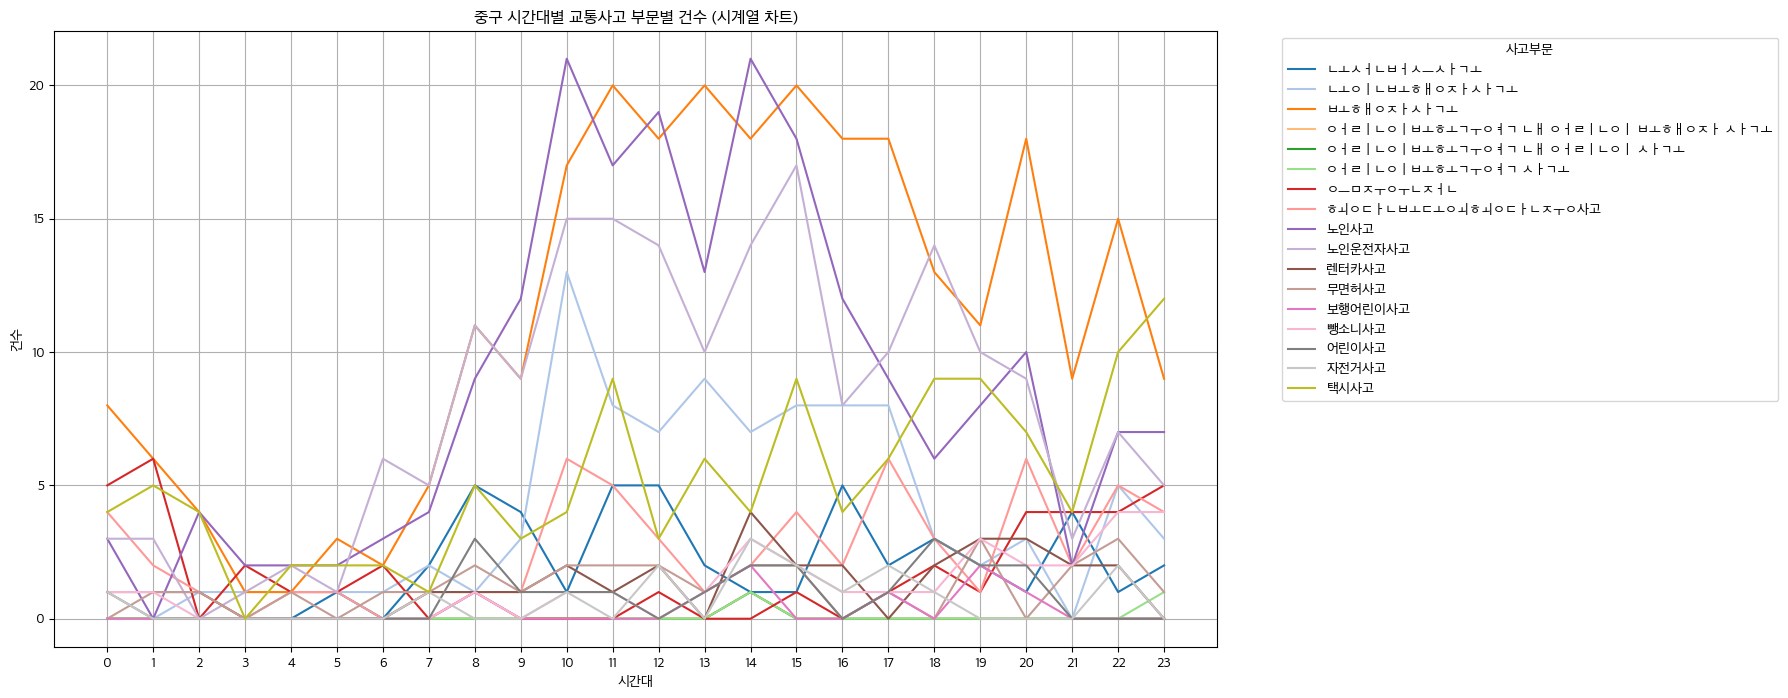

사고부문  노선버스사고  노인보행자사고  보행자사고  \
시간대                                                  
0                 0                 0            8   
1                 0                 0            6   
2                 0                 1            4   
3                 0                 1            1   
4                 0                 1            1   
5                 1                 1            3   
6                 0                 1            2   
7                 2                 2            5   
8                 5                 1           11   
9                 4                 3            9   
10                1                13           17   
11                5                 8           20   
12                5                 7           18   
13                2                 9           20   
14                1                 7           18   
15                1                 8           20   
16                5         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# '시군구' 열에서 두 번째 문자열을 추출하여 '시군구' 열로 사용
df['시군구'] = df['시군구'].apply(lambda x: x.split()[1] if isinstance(x, str) and len(x.split()) > 1 else 'Unknown')

# '시군구' 열이 '중구'인 행만 선택
중구_교통사고 = df[df['시군구'] == '중구']

# '사고부문' 열이 있는 행만 선택
사고부문_교통사고 = 중구_교통사고[['사고일시', '사고부문', '시간대']]

# 시간대별로 사고 부문별 건수 계산
시간대별_사고부문_교통사고수 = 사고부문_교통사고.groupby(['시간대', '사고부문']).size().unstack(fill_value=0)

# 데이터프레임을 'long' 형태로 변환
시간대별_사고부문_교통사고수_long = 시간대별_사고부문_교통사고수.reset_index().melt(id_vars='시간대', var_name='사고부문', value_name='건수')

# 시간대별 사고 부문별 건수를 시계열 차트로 그리기
plt.figure(figsize=(15, 8))
sns.lineplot(data=시간대별_사고부문_교통사고수_long, x='시간대', y='건수', hue='사고부문', markers=True, palette='tab20')
plt.title('중구 시간대별 교통사고 부문별 건수 (시계열 차트)')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(24))  # x축에 고정된 범위의 시간대 표시
plt.legend(title='사고부문', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

print(시간대별_사고부문_교통사고수)


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/3217161920.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=연령대별_사고수.index, y=연령대별_사고수.values, palette='viridis')


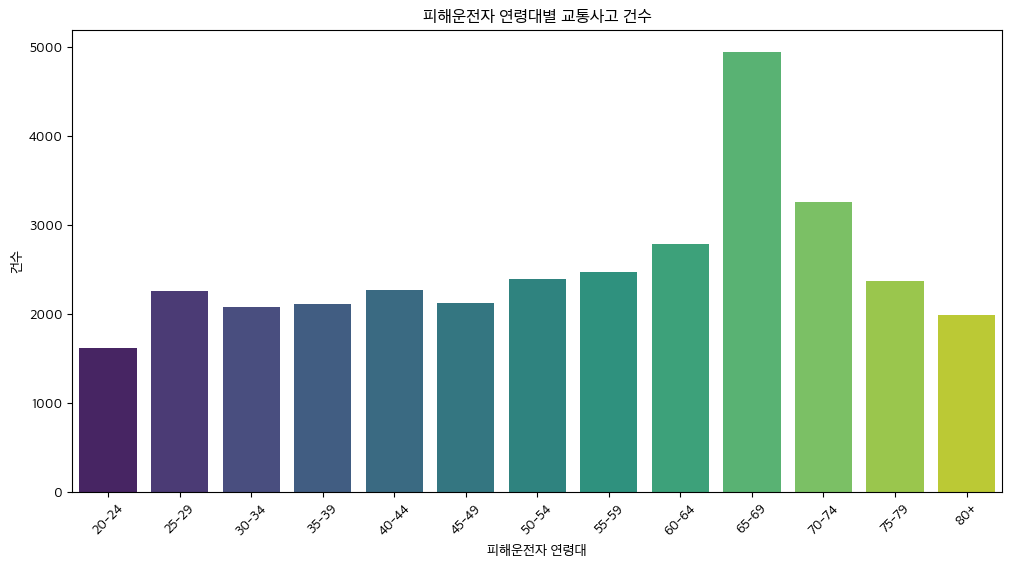

/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/3217161920.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=시간대별_사고수.index, y=시간대별_사고수.values, palette='viridis')


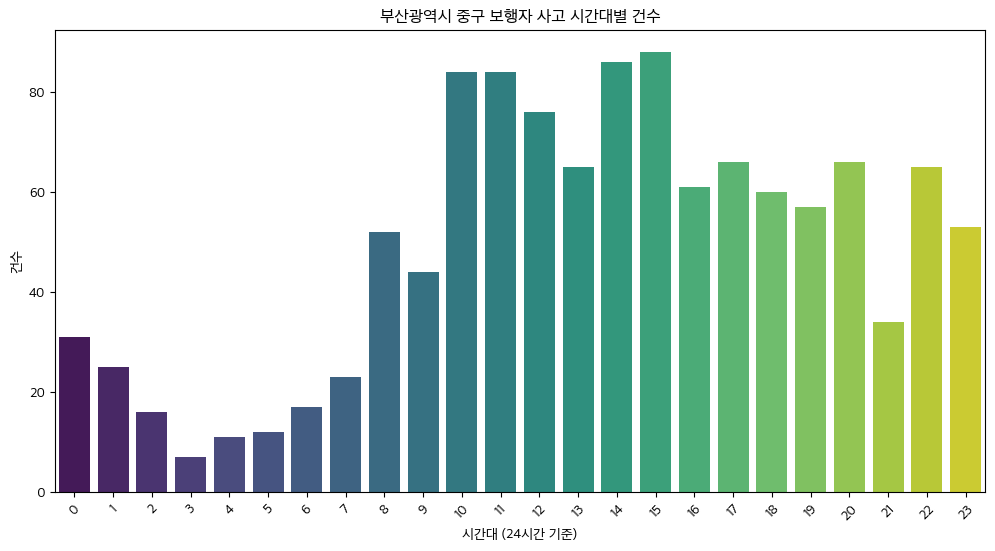

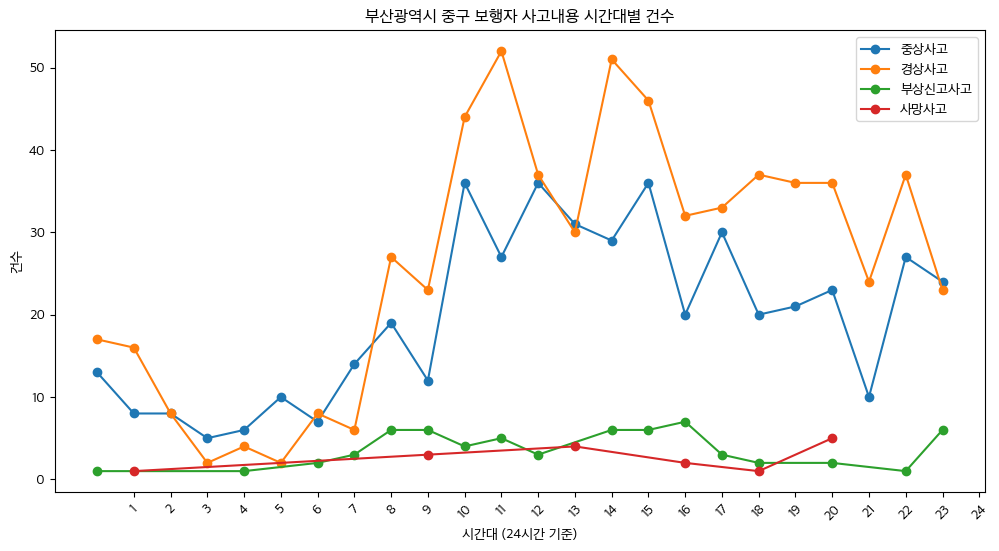

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열에서 두 번째 문자열을 추출하여 '시군구' 열로 사용
df['시군구'] = df['시군구'].apply(lambda x: x.split()[1] if isinstance(x, str) and len(x.split()) > 1 else 'Unknown')

# '시군구' 열이 '중구'인 행만 선택
중구_데이터 = df[df['시군구'] == '중구']

# '피해운전자 연령' 열의 데이터를 숫자형으로 변환
df['피해운전자 연령'] = pd.to_numeric(df['피해운전자 연령'], errors='coerce')

# '피해운전자 연령대' 컬럼 추가
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
df['피해운전자 연령대'] = pd.cut(df['피해운전자 연령'], bins=age_bins, labels=age_labels, right=False)

# 피해운전자 연령대별로 사고 건수 계산
연령대별_사고수 = df['피해운전자 연령대'].value_counts().sort_index()

# 피해운전자 연령대별 사고 건수를 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=연령대별_사고수.index, y=연령대별_사고수.values, palette='viridis')
plt.title('피해운전자 연령대별 교통사고 건수')
plt.xlabel('피해운전자 연령대')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.show()

# 중구 내에서 시간대별 '보행자' 사고 건수 계산
시간대별_사고수 = 중구_데이터['사고일시'].dt.hour.value_counts().sort_index()

# 중구 내에서 시간대별 '보행자' 사고 건수를 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=시간대별_사고수.index, y=시간대별_사고수.values, palette='viridis')
plt.title('부산광역시 중구 보행자 사고 시간대별 건수')
plt.xlabel('시간대 (24시간 기준)')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.show()

# 중구 내에서 '보행자' 사고 건수 계산
사고내용_list = 중구_데이터['사고내용'].unique()
plt.figure(figsize=(12, 6))

for 사고내용 in 사고내용_list:
    사고_사고수 = 중구_데이터[중구_데이터['사고내용'] == 사고내용]['사고일시'].dt.hour.value_counts().sort_index()
    plt.plot(사고_사고수.index, 사고_사고수.values, label=f'{사고내용}', marker='o')

plt.title('부산광역시 중구 보행자 사고내용 시간대별 건수')
plt.xlabel('시간대 (24시간 기준)')
plt.ylabel('건수')
plt.legend()
plt.xticks(range(1, 25))  # 1부터 24까지 표시
plt.xticks(rotation=45)
plt.show()


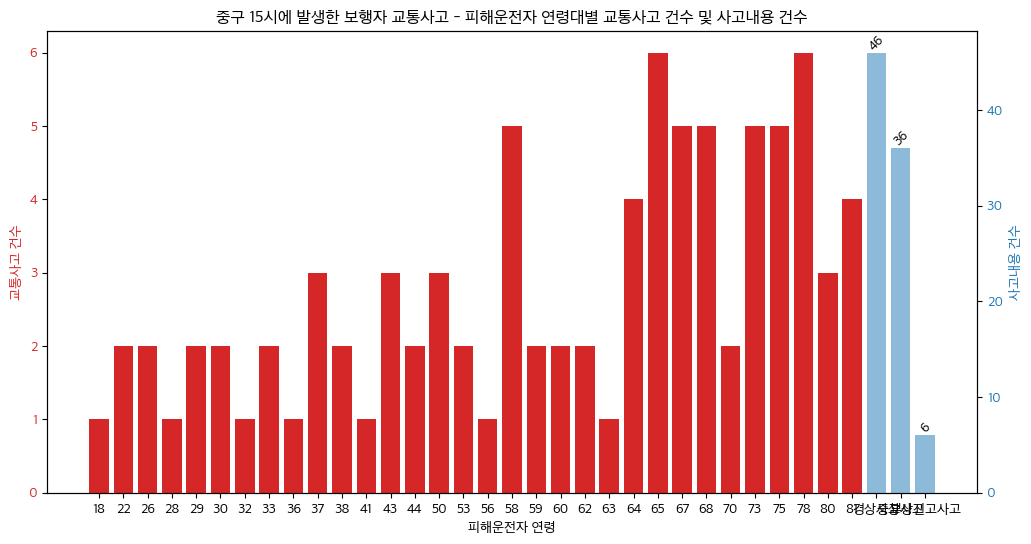

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열에서 두 번째 문자열을 추출하여 '시군구' 열로 사용
df['시군구'] = df['시군구'].apply(lambda x: x.split()[1] if isinstance(x, str) and len(x.split()) > 1 else 'Unknown')

# 중구 내에서 시간대별 '보행자' 사고 건수 계산
중구_데이터 = df[df['시군구'] == '중구']
시간대_데이터 = 중구_데이터[중구_데이터['사고일시'].dt.hour == 15]

# 피해운전자 연령대별 교통사고 건수 및 사고내용 건수 계산
피해운전자_연령대별_교통사고수 = 시간대_데이터['피해운전자 연령'].value_counts().sort_index()
사고내용_데이터 = 시간대_데이터['사고내용'].value_counts()

# 피해운전자 연령대별 교통사고 건수와 사고내용 건수를 함께 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 피해운전자 연령대별 교통사고 건수를 막대 그래프로 표현
color = 'tab:red'
ax1.set_xlabel('피해운전자 연령')
ax1.set_ylabel('교통사고 건수', color=color)
ax1.bar(피해운전자_연령대별_교통사고수.index, 피해운전자_연령대별_교통사고수.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 사고내용 건수를 막대 그래프로 표현
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('사고내용 건수', color=color)
bars = ax2.bar(사고내용_데이터.index, 사고내용_데이터.values, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# 사고내용 텍스트를 추가하고 45도로 회전
for bar, value in zip(bars, 사고내용_데이터.values):
    ax2.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', rotation=45)

# 그래프 제목 설정
plt.title('중구 15시에 발생한 보행자 교통사고 - 피해운전자 연령대별 교통사고 건수 및 사고내용 건수')

# x 축 눈금 레이블 회전
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.show()


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/487666952.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=연령대별_사고수.index, y=연령대별_사고수.values, palette='viridis')


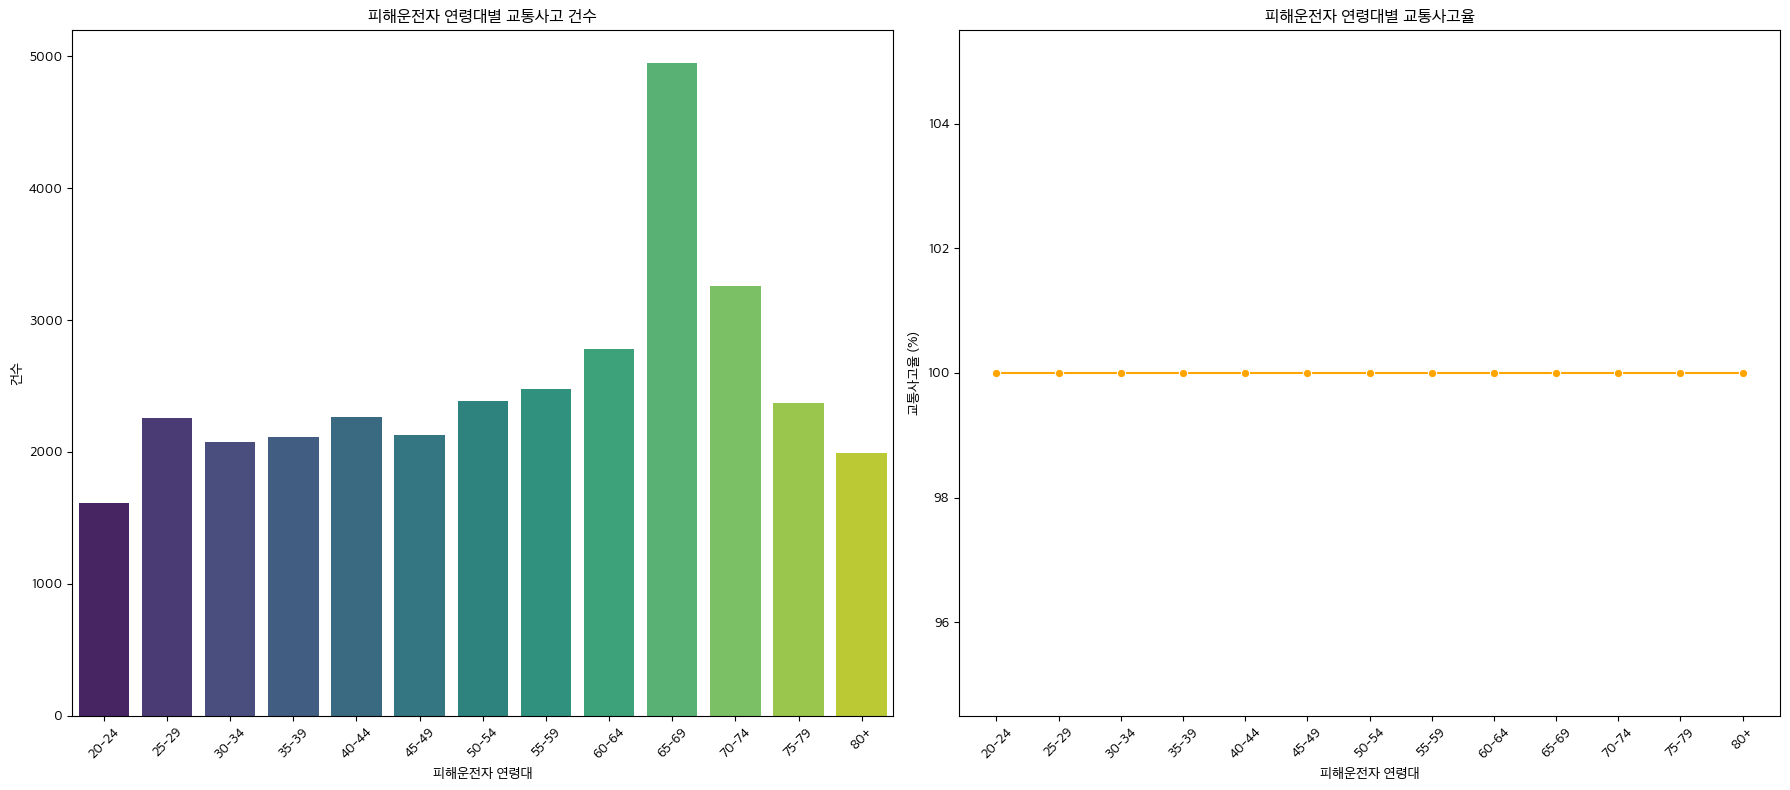

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열에서 두 번째 문자열을 추출하여 '시군구' 열로 사용
df['시군구'] = df['시군구'].apply(lambda x: x.split()[1] if isinstance(x, str) and len(x.split()) > 1 else 'Unknown')

# '시군구' 열이 '중구'인 행만 선택
중구_데이터 = df[df['시군구'] == '중구']

# '피해운전자 연령' 열의 데이터를 숫자형으로 변환
df['피해운전자 연령'] = pd.to_numeric(df['피해운전자 연령'], errors='coerce')

# '피해운전자 연령대' 컬럼 추가
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100]
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
df['피해운전자 연령대'] = pd.cut(df['피해운전자 연령'], bins=age_bins, labels=age_labels, right=False)

# 피해운전자 연령대별 사고 건수 계산
연령대별_사고수 = df['피해운전자 연령대'].value_counts().sort_index()

# 피해운전자 연령대별 교통사고율 계산
연령대별_교통사고율 = (연령대별_사고수 / df['피해운전자 연령대'].value_counts().sort_index()) * 100

# 피해운전자 연령대별 사고 건수 및 교통사고율을 시각화
plt.figure(figsize=(18, 8))

# 피해운전자 연령대별 사고 건수 막대 그래프
plt.subplot(1, 2, 1)
sns.barplot(x=연령대별_사고수.index, y=연령대별_사고수.values, palette='viridis')
plt.title('피해운전자 연령대별 교통사고 건수')
plt.xlabel('피해운전자 연령대')
plt.ylabel('건수')
plt.xticks(rotation=45)

# 피해운전자 연령대별 교통사고율 선 그래프
plt.subplot(1, 2, 2)
sns.lineplot(x=연령대별_교통사고율.index, y=연령대별_교통사고율.values, marker='o', color='orange')
plt.title('피해운전자 연령대별 교통사고율')
plt.xlabel('피해운전자 연령대')
plt.ylabel('교통사고율 (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


중복된 '구' 데이터:
              시군구_x  교통사고건수     구 시군구_y  읍면동수     인구수     면적    인구밀도
1     부산광역시 연제구 거제동     676   연제구   연제구    12  204504  12.10  16,901
3    부산광역시 부산진구 전포동     686  부산진구  부산진구    20  358644  29.67  12,088
4    부산광역시 부산진구 범천동     540  부산진구  부산진구    20  358644  29.67  12,088
5    부산광역시 부산진구 양정동     507  부산진구  부산진구    20  358644  29.67  12,088
6    부산광역시 부산진구 개금동     480  부산진구  부산진구    20  358644  29.67  12,088
..              ...     ...   ...   ...   ...     ...    ...     ...
187  부산광역시 중구 남포동3가       6    중구    중구     9   41909   2.83  14,809
188  부산광역시 중구 신창동3가       4    중구    중구     9   41909   2.83  14,809
189  부산광역시 중구 동광동4가       3    중구    중구     9   41909   2.83  14,809
190  부산광역시 중구 중앙동1가       2    중구    중구     9   41909   2.83  14,809
191  부산광역시 중구 동광동2가       1    중구    중구     9   41909   2.83  14,809

[176 rows x 8 columns]
        구  인구당_교통사고율
0     연제구   7.598873
2    부산진구   4.235398
13     남구   4.289751
19    수영구   5.067520
24    동래구   3.206471
33   해운대구

/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1834793894.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_data['인구당_교통사고율'] = result_data['교통사고건수'] / result_data['인구수'] * 1000  # 인구 1000명당 교통사고 건수


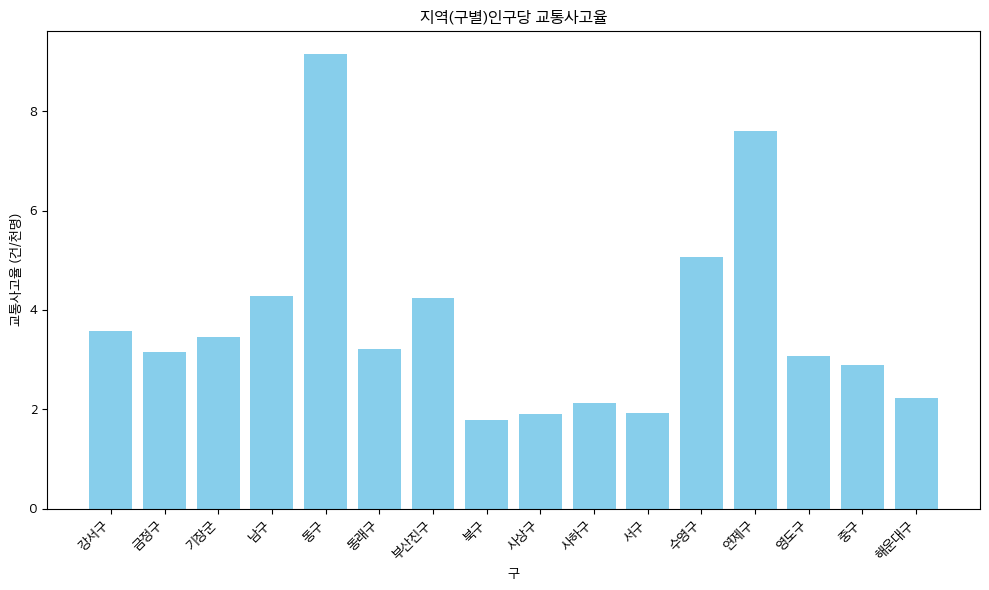

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
accident_file_path = '교통사고2.csv'
region_file_path = '부산광역시전체세대및인구.csv'

# CSV 파일 읽기
accident_data = pd.read_csv(accident_file_path)
region_data = pd.read_csv(region_file_path)

# 교통사고건수 카운트
accident_count = accident_data['시군구'].value_counts().reset_index()
accident_count.columns = ['시군구', '교통사고건수']

# '시군구'에서 '구' 정보만 추출
accident_count['구'] = accident_count['시군구'].str.split(' ').str[1]

# 데이터프레임의 '교통사고건수', '인구수', '면적' 컬럼을 숫자로 변환
region_data['인구수'] = region_data['인구수'].apply(lambda x: int(x.replace(',', '')))
accident_count['교통사고건수'] = accident_count['교통사고건수'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)

# '시군구'와 '구'를 기준으로 데이터 병합
merged_data = pd.merge(accident_count, region_data, how='inner', left_on='구', right_on='시군구')

# 중복된 '구' 데이터 확인
duplicate_data = merged_data[merged_data.duplicated('구')]
print("중복된 '구' 데이터:")
print(duplicate_data)

# 중복된 '구' 데이터 제거
result_data = merged_data.drop_duplicates('구')

# 인구당 교통사고율 계산
result_data['인구당_교통사고율'] = result_data['교통사고건수'] / result_data['인구수'] * 1000  # 인구 1000명당 교통사고 건수

# 필요한 열만 선택
result_data = result_data[['구', '인구당_교통사고율']]

# 결과 출력
print(result_data.head(20))

# 그래프의 기본 설정
plt.figure(figsize=(10, 6))

# '구'를 기준으로 정렬
result_data = result_data.sort_values(by='구')

# 인구당 교통사고율 막대 그래프
plt.bar(result_data['구'], result_data['인구당_교통사고율'], color='skyblue')
plt.title('지역(구별)인구당 교통사고율')
plt.xlabel('구')
plt.ylabel('교통사고율 (건/천명)')

# 그래프 출력
plt.xticks(rotation=45, ha='right')  # x축 레이블을 읽기 쉽게 회전
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 주어진 데이터
data = {
    '구': ['연제구', '연제구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '부산진구', '남구', '남구', '남구', '남구', '남구', '남구', '수영구'],
    '인구당_교통사고율': [7.598873, 3.305559, 4.235398, 1.912760, 1.505671, 1.413658, 1.338375, 1.123677, 1.115312, 1.040029, 0.591115, 0.423819, 0.253734, 4.289751, 1.563376, 1.544310, 0.549088, 0.385124, 0.369872, 5.067520],
    '면적당_교통사고율': [128.429752, 55.867769, 51.196495, 23.120998, 18.200202, 17.087968, 16.177958, 13.582744, 13.481631, 12.571621, 7.145265, 5.123020, 3.067071, 41.946309, 15.287099, 15.100671, 5.369128, 3.765846, 3.616704, 87.573386]
}

df = pd.DataFrame(data)

# '구'를 기준으로 그룹화하고 평균값 계산
result_data = df.groupby('구').mean().reset_index()

# 결과 출력
print(result_data)


      구  인구당_교통사고율  면적당_교통사고율
0    남구   1.450253  14.180960
1  부산진구   1.359413  16.432270
2   수영구   5.067520  87.573386
3   연제구   5.452216  92.148761


In [ ]:
import pandas as pd

# CSV 파일 경로
accident_file_path = '교통사고2.csv'
region_file_path = '부산광역시전체세대및인구.csv'


# CSV 파일 읽기
accident_data = pd.read_csv(accident_file_path)
region_data = pd.read_csv(region_file_path)
area_df = pd.DataFrame(area_data)

# 교통사고건수 카운트
accident_count = accident_data['시군구'].value_counts().reset_index()
accident_count.columns = ['시군구', '교통사고건수']

# '시군구'에서 '구' 정보만 추출
accident_count['구'] = accident_count['시군구'].str.split(' ').str[1]

# 데이터프레임의 '교통사고건수', '인구수', '면적' 컬럼을 숫자로 변환
merged_data['교통사고건수'] = merged_data['교통사고건수'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)
merged_data['인구수'] = merged_data['인구수'].apply(lambda x: int(x.replace(',', '')))
# merged_data['면적']는 이미 부동 소수점이므로 변환할 필요가 없습니다.

# 인구당 교통사고율 계산
merged_data['인구당_교통사고율'] = merged_data['교통사고건수'] / merged_data['인구수'] * 1000  # 인구 1000명당 교통사고 건수



# 중복된 '구' 데이터 확인
duplicate_data = merged_data[merged_data.duplicated('구')]
print("중복된 '구' 데이터:")
print(duplicate_data)

# 중복된 '구' 데이터 제거
result_data = merged_data.drop_duplicates('구')

# 필요한 열만 선택
result_data = result_data[['구', '인구당_교통사고율']]

# 결과 출력
print(result_data.head(20))


AttributeError: 'int' object has no attribute 'replace'

In [ ]:
import pandas as pd

# CSV 파일 경로
accident_file_path = '교통사고2.csv'
region_file_path = '부산광역시전체세대및인구.csv'

# CSV 파일 읽기
accident_data = pd.read_csv(accident_file_path)
region_data = pd.read_csv(region_file_path)

# 교통사고건수 카운트
accident_count = accident_data['시군구'].value_counts().reset_index()
accident_count.columns = ['구', '교통사고건수']

# 데이터프레임의 '교통사고건수', '인구수', '면적' 컬럼을 숫자로 변환
accident_count['교통사고건수'] = accident_count['교통사고건수'].apply(lambda x: int(x.replace(',', '')))

# 두 데이터를 '구'를 기준으로 병합
merged_data = pd.merge(accident_count, region_data, how='inner', left_on='구', right_on='시군구')

# 면적과 인구수를 숫자로 변환
merged_data['인구수'] = merged_data['인구수'].apply(lambda x: int(x.replace(',', '')))
merged_data['면적'] = merged_data['면적'].apply(lambda x: float(x.replace(',', '')))

# 인구당 교통사고율 계산
merged_data['인구당_교통사고율'] = merged_data['교통사고건수'] / merged_data['인구수'] * 1000  # 인구 1000명당 교통사고 건수

# 면적당 교통사고율 계산
merged_data['면적당_교통사고율'] = merged_data['교통사고건수'] / merged_data['면적']  # 1㎢당 교통사고 건수

# 필요한 열만 선택
result_data = merged_data[['구', '인구당_교통사고율', '면적당_교통사고율']]

# 결과 출력
print(result_data)


AttributeError: 'int' object has no attribute 'replace'

In [ ]:
import pandas as pd

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', nrows=1000)

# '시군구' 열의 NaN 값을 'Unknown'으로 대체
df['시군구'] = df['시군구'].fillna('Unknown')

# '시군구' 열을 기준으로 중구를 포함하는 행을 필터링
중구를_포함하는_시군구 = df[df['시군구'].str.contains('중구')]['시군구'].unique()

# 결과 출력
print(중구를_포함하는_시군구)


['부산광역시 중구 보수동2가' '부산광역시 중구 남포동6가' '부산광역시 중구 중앙동4가' '부산광역시 중구 부평동1가'
 '부산광역시 중구 부평동4가' '부산광역시 중구 대청동3가' '부산광역시 중구 부평동2가' '부산광역시 중구 중앙동2가'
 '부산광역시 중구 창선동1가' '부산광역시 중구 남포동5가' '부산광역시 중구 부평동3가' '부산광역시 중구 남포동4가'
 '부산광역시 중구 중앙동5가' '부산광역시 중구 영주동' '부산광역시 중구 남포동1가' '부산광역시 중구 중앙동3가'
 '부산광역시 중구 대청동2가' '부산광역시 중구 광복동1가' '부산광역시 중구 신창동1가' '부산광역시 중구 대청동4가'
 '부산광역시 중구 동광동5가' '부산광역시 중구 대창동1가' '부산광역시 중구 신창동4가' '부산광역시 중구 보수동3가'
 '부산광역시 중구 보수동1가']


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/3991263751.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour


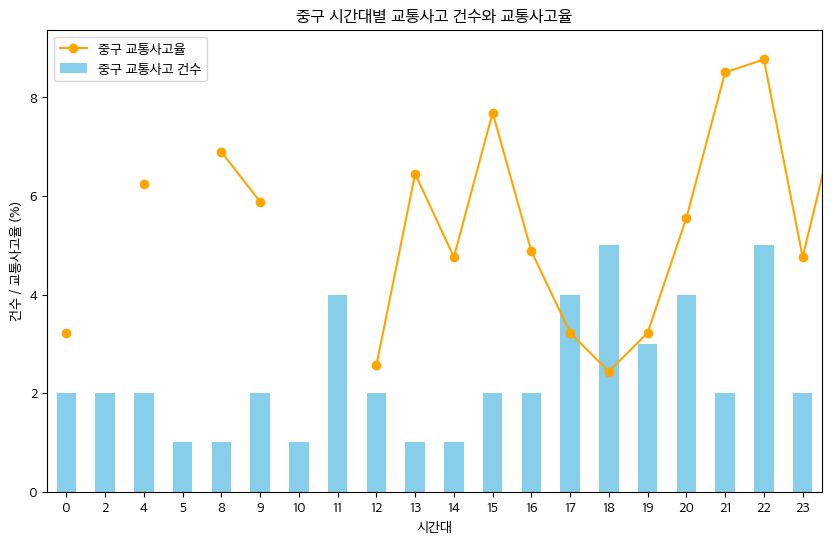

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', nrows=1000)

# '시군구' 열의 NaN 값을 'Unknown'으로 대체
df['시군구'] = df['시군구'].fillna('Unknown')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열이 중구인 행만 선택
중구_교통사고 = df[df['시군구'].str.contains('중구')]

# '시간대' 컬럼 추가
중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour

# 시간대별 교통사고 수 계산
시간대별_교통사고수 = 중구_교통사고['시간대'].value_counts().sort_index()

# 중구 전체 교통사고 수 계산
전체_교통사고수 = df['사고일시'].dt.hour.value_counts().sort_index()

# 교통사고율 계산
교통사고율 = (시간대별_교통사고수 / 전체_교통사고수) * 100

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_교통사고수.plot(kind='bar', color='skyblue', label='중구 교통사고 건수')
교통사고율.plot(kind='line', color='orange', label='중구 교통사고율', marker='o')

plt.title('중구 시간대별 교통사고 건수와 교통사고율')
plt.xlabel('시간대')
plt.ylabel('건수 / 교통사고율 (%)')
plt.legend()
plt.show()


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/350505210.py:8: DtypeWarning: Columns (23,24,25,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',')


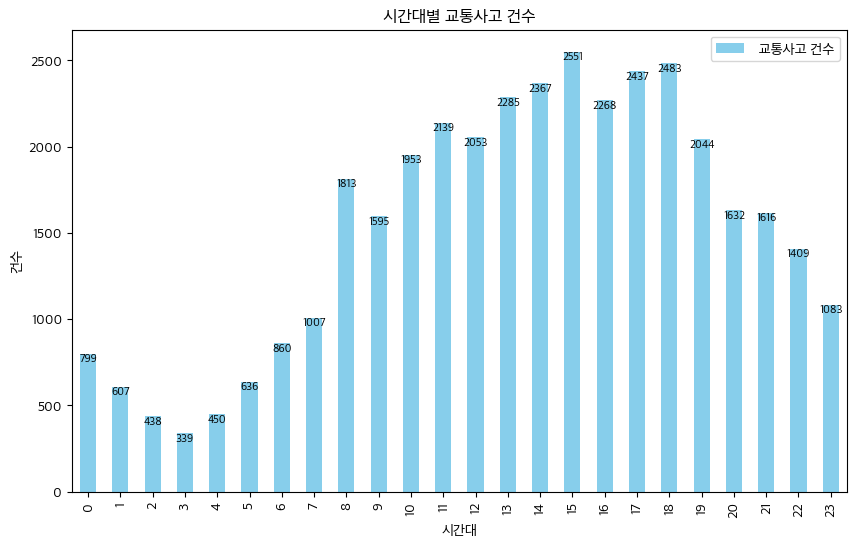

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',')

# '시군구' 열의 NaN 값을 'Unknown'으로 대체
df['시군구'] = df['시군구'].fillna('Unknown')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 교통사고 수 계산
시간대별_교통사고수 = df['시간대'].value_counts().sort_index()

# 모든 시간대에 대해 초기화
전체_교통사고수 = pd.Series(0, index=range(24))
전체_교통사고수.update(시간대별_교통사고수)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
전체_교통사고수.plot(kind='bar', color='skyblue', label=' 교통사고 건수')

# 교통사고 건수 숫자 표시
for i, v in enumerate(전체_교통사고수):
    plt.text(i, v + 1, str(v), ha='center', va='top', fontsize=8)

plt.title('시간대별 교통사고 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.legend()
plt.show()


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/4274179543.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour


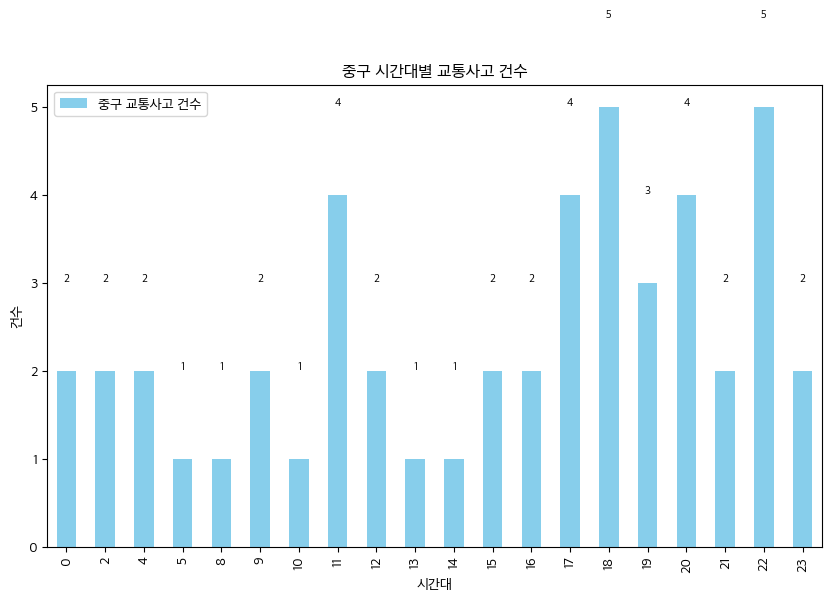

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', nrows=1000)

# '시군구' 열의 NaN 값을 'Unknown'으로 대체
df['시군구'] = df['시군구'].fillna('Unknown')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열이 중구인 행만 선택
중구_교통사고 = df[df['시군구'].str.contains('중구')]

# '시간대' 컬럼 추가
중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour

# 시간대별 교통사고 수 계산
시간대별_교통사고수 = 중구_교통사고['시간대'].value_counts().sort_index()

# 중구 전체 교통사고 수 계산
전체_교통사고수 = df['사고일시'].dt.hour.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
bar_plot = 시간대별_교통사고수.plot(kind='bar', color='skyblue', label='중구 교통사고 건수')

# 교통사고 건수 숫자 표시
for i, v in enumerate(시간대별_교통사고수):
    bar_plot.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.title('중구 시간대별 교통사고 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.legend()
plt.show()


/var/folders/b5/8y2g6l3s2lq57xxrwhwt6h7h0000gn/T/ipykernel_89990/1404656268.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour


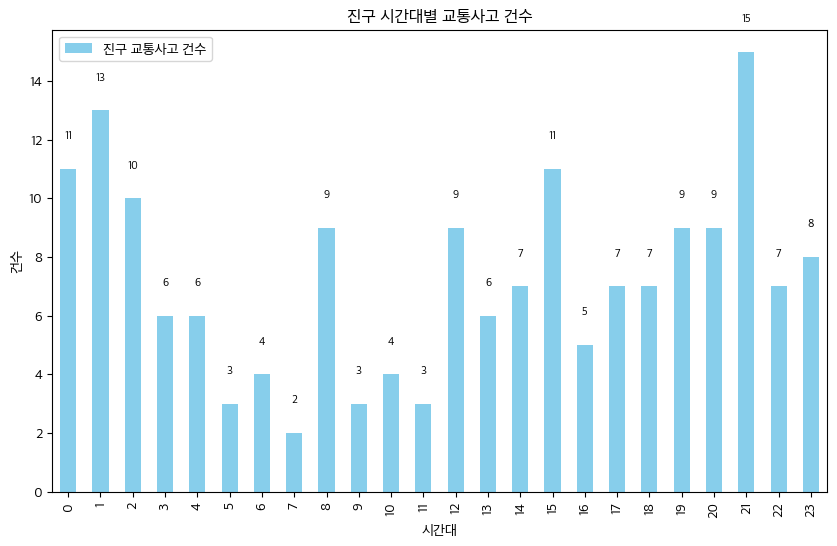

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '교통사고2.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', nrows=1000)

# '시군구' 열의 NaN 값을 'Unknown'으로 대체
df['시군구'] = df['시군구'].fillna('Unknown')

# '사고일시' 열을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시군구' 열이 중구인 행만 선택
중구_교통사고 = df[df['시군구'].str.contains('부산진구')]

# '시간대' 컬럼 추가
중구_교통사고['시간대'] = 중구_교통사고['사고일시'].dt.hour

# 시간대별 교통사고 수 계산
시간대별_교통사고수 = 중구_교통사고['시간대'].value_counts().sort_index()

# 중구 전체 교통사고 수 계산
전체_교통사고수 = df['사고일시'].dt.hour.value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
bar_plot = 시간대별_교통사고수.plot(kind='bar', color='skyblue', label='진구 교통사고 건수')

# 교통사고 건수 숫자 표시
for i, v in enumerate(시간대별_교통사고수):
    bar_plot.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.title('진구 시간대별 교통사고 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.legend()
plt.show()


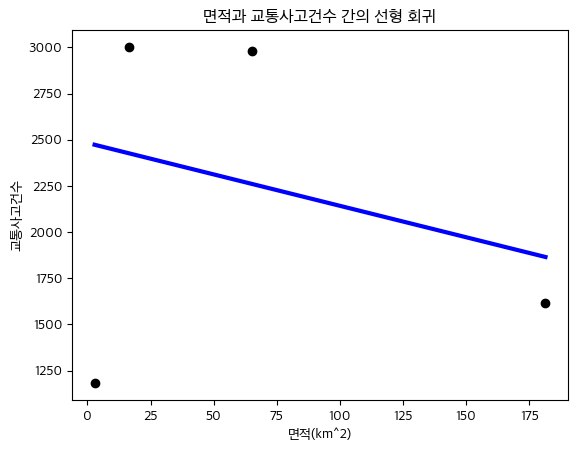

Mean Squared Error: 644667.6351668958
R-squared: 0.01996518677290071


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기 (실제 데이터를 사용해야 합니다)
data = {
    '교통사고건수': [1615, 2981, 1411, 2282, 1836, 3003, 5363, 1810, 2396, 2706, 1642, 2223, 2230, 1309, 1183, 2874],
    '면적(km^2)': [181.49, 65.27, 217.30, 26.81, 9.74, 16.63, 29.67, 39.37, 36.09, 41.89, 13.98, 10.21, 12.10, 14.19, 2.83, 51.47]
}

df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(y) 설정
X = df[['면적(km^2)']]
y = df['교통사고건수']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 회귀선 및 데이터 포인트 시각화
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('면적(km^2)')
plt.ylabel('교통사고건수')
plt.title('면적과 교통사고건수 간의 선형 회귀')
plt.show()

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


/Users/u020/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


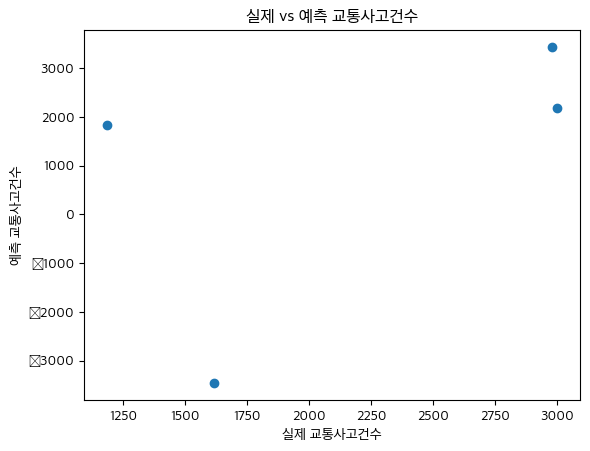

Mean Squared Error: 6756118.0341318855
R-squared: -9.270766693610316


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기 (실제 데이터를 사용해야 합니다)
data = {
    '교통사고건수': [1615, 2981, 1411, 2282, 1836, 3003, 5363, 1810, 2396, 2706, 1642, 2223, 2230, 1309, 1183, 2874],
    '면적(km^2)': [181.49, 65.27, 217.30, 26.81, 9.74, 16.63, 29.67, 39.37, 36.09, 41.89, 13.98, 10.21, 12.10, 14.19, 2.83, 51.47],
    '사망자수': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    '중상자수': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    '경상자수': [5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # Add other features as needed
}

df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(y) 설정
X = df[['면적(km^2)', '사망자수', '중상자수', '경상자수']]  # Add other features as needed
y = df['교통사고건수']

# 데이터를 학습용과 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 회귀선 및 데이터 포인트 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('실제 교통사고건수')
plt.ylabel('예측 교통사고건수')
plt.title('실제 vs 예측 교통사고건수')
plt.show()

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
